In [111]:
#import necessary packages
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# Here is the analysis on the state data(tSNE, kmeans original, kmeans tsne)

In [161]:

#make 2 variables, one numpy so we can run tsne and k-means in accordance.
data = pd.read_csv("Data_with_Depression.csv").drop(['Pop', 'Unnamed: 0' ], axis=1)

data_array = data.drop(['index', 'Fentanyl_deaths_2022'], axis=1).to_numpy()



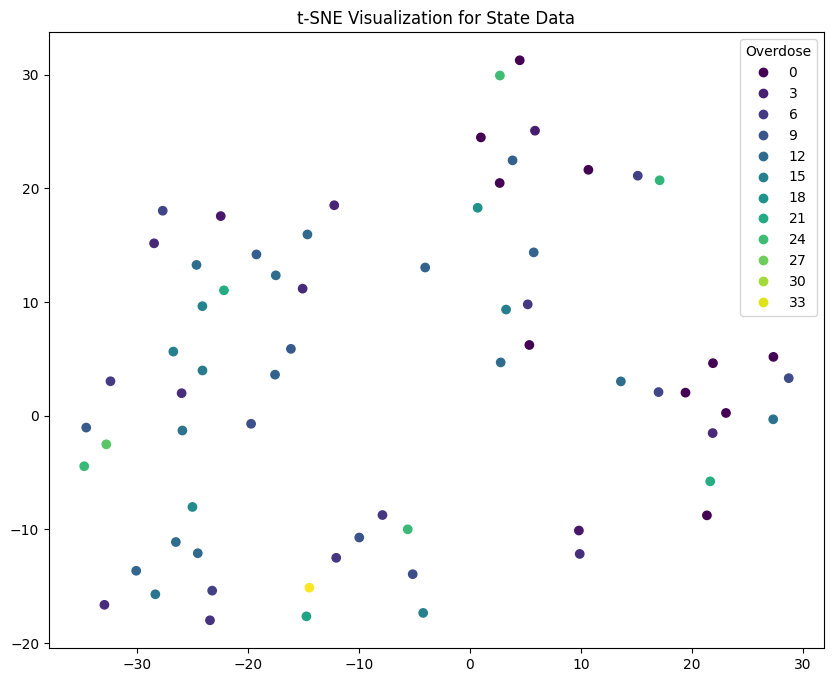

In [230]:

#set X and y
X = data_array

y = data['Fentanyl_deaths_2022'] 
#run tSNE
tsne = TSNE(n_components=2, perplexity=7, n_iter = 10000000000000000000, init = 'random')

X_tsne = tsne.fit_transform(X)

tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Target'] = y  
#plot tSNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Target'], cmap='viridis')
plt.title('t-SNE Visualization for State Data')
plt.legend(*scatter.legend_elements(), title='Overdose')
plt.show()



/Users/nehabangalore/minicondafolder/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 1 Center: [12.285884   7.0684934]
Cluster 2 Center: [-20.962317 -11.279905]
Cluster 3 Center: [-19.465263  16.50442 ]
Cluster 4 Center: [  6.1959243 -21.466421 ]
Cluster 5 Center: [26.707409 -9.691675]


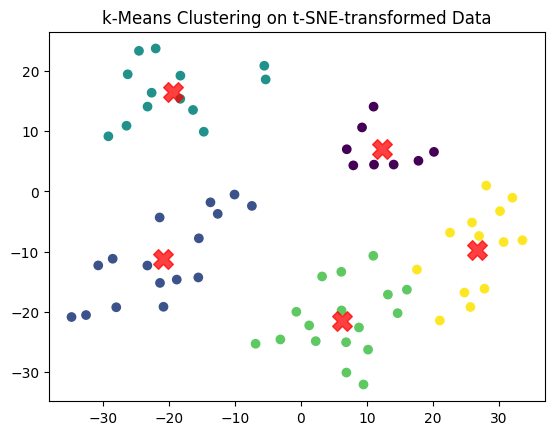

In [166]:
#run kmeans in relation to tsne data to get the preferred k value
#after a few iterations and adjustments, we determined k=5
kmeans = KMeans(n_clusters=5, random_state=42)
#fit kmeans to tsne data
y_kmeans = kmeans.fit_predict(X_tsne)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
#plot centers to visually understand the clusters
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, alpha=0.75)
plt.title('k-Means Clustering on t-SNE-transformed Data')
#printed each cluster center value for more cluster understanding
for i, center in enumerate(centers):
    print(f"Cluster {i + 1} Center: {center}")
plt.show()

/Users/nehabangalore/minicondafolder/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0: 25 points
Cluster 1: 20 points
Cluster 2: 3 points
Cluster 3: 10 points
Cluster 4: 9 points


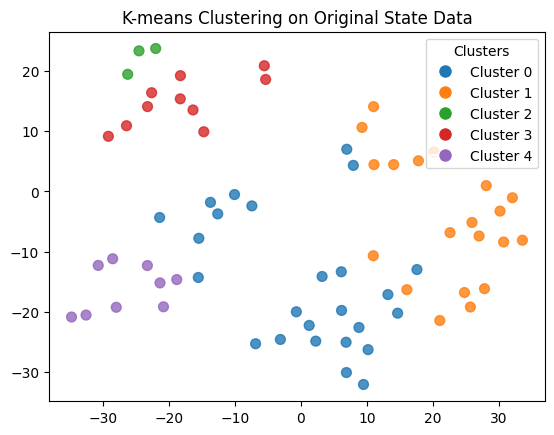

In [227]:
#imported colormap so we can create our own colormap

from matplotlib.colors import ListedColormap
#set desired colors and created colormap object
colors_og = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
custom_cmap_og = ListedColormap(colors_og)
#run kmeans
kmeans = KMeans(n_clusters=5, random_state=42)
#fit kmeans to original data
kmeans.fit(X)
#set labels for kmeans
labels = kmeans.labels_
unique_labels_og = np.unique(labels)
centroids = kmeans.cluster_centers_
unique_labels_og, counts = np.unique(labels, return_counts = True)
#print cluster label and how many points each has
for label, count in zip(unique_labels_og, counts):
    print(f'Cluster {label}: {count} points')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap=custom_cmap_og, s=50, alpha=0.8)
legend_handles_og = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab10(i), markersize=10) for i in unique_labels_og]
legend_labels_og = [f'Cluster {i}' for i in unique_labels_og]
plt.legend(handles=legend_handles_og, labels=legend_labels_og, title='Clusters')
plt.title('K-means Clustering on Original State Data')
plt.show()


In [167]:
#Here is the analysis on the national data normalized  (tSNE, kmeans original, kmeans tsne)

In [179]:
#read national data and filter out unwanted data 
national_data = pd.read_csv("national_data_normalized.csv").drop(["Unnamed: 0","Population_Density_Norm"], axis = 1)
national_data = national_data[national_data['Overdoses'] != 0]
national_data = national_data[national_data['Traffic_Norm'] != 1]
#create the array for analysis
national_data_array = national_data.drop(['Overdoses', "County Name"], axis=1).dropna().to_numpy()
#set x and y vals
Xnat = national_data_array

ynat = national_data['Overdoses'] 



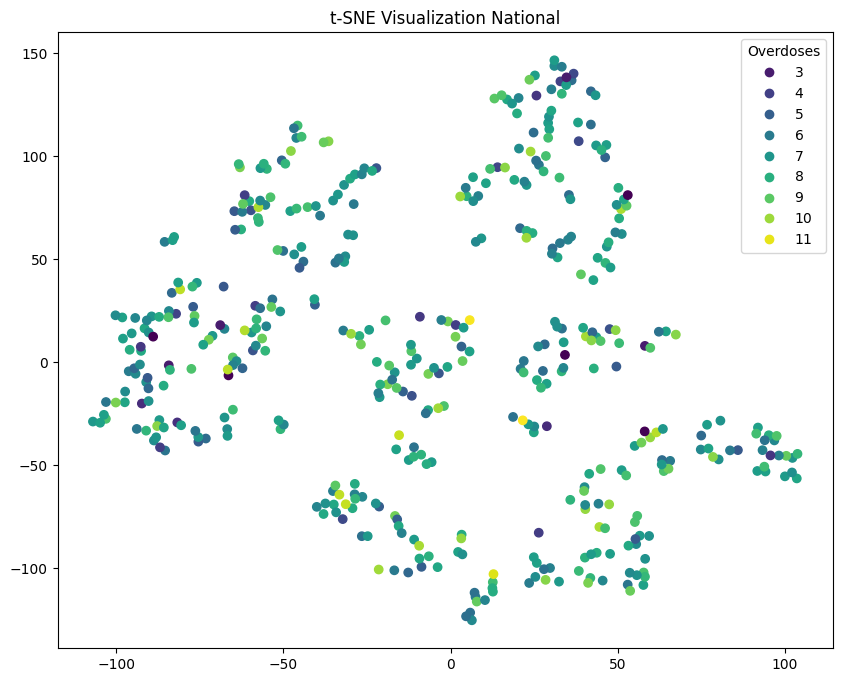

In [184]:
#run tsne on national data
nattsne = TSNE(n_components=2, perplexity=30, n_iter = 100000, init = 'pca')

Xnat_tsne = tsne.fit_transform(Xnat)
#set target variable to compare to as the overdoses
nattsne_df = pd.DataFrame(data=Xnat_tsne, columns=['Dimension 1', 'Dimension 2'])
nattsne_df['Target'] = ynat 
#plot the tSNE data in relation to overdoses
plt.figure(figsize=(10, 8))
scatter = plt.scatter(nattsne_df['Dimension 1'], nattsne_df['Dimension 2'], c=np.log(nattsne_df['Target']), cmap='viridis')
plt.title('t-SNE Visualization National')
plt.legend(*scatter.legend_elements(), title='Overdoses')
plt.show()

/Users/nehabangalore/minicondafolder/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 1 Center: [12.285884   7.0684934]
Cluster 2 Center: [-20.962317 -11.279905]
Cluster 3 Center: [-19.465263  16.50442 ]
Cluster 4 Center: [  6.1959243 -21.466421 ]
Cluster 5 Center: [26.707409 -9.691675]


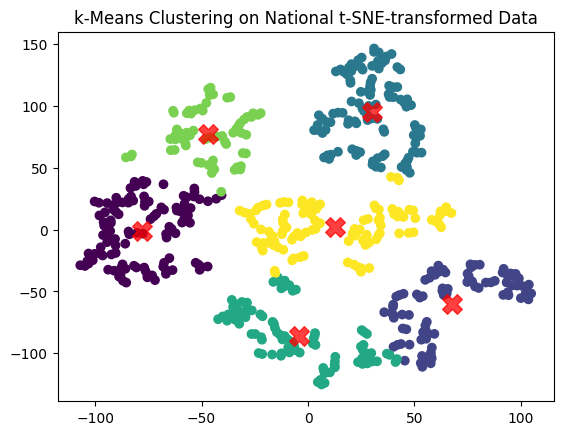

In [234]:
#run kmeans in relation to the tsne data
natkmeans = KMeans(n_clusters=6, random_state=42)
naty_kmeans = natkmeans.fit_predict(Xnat_tsne)
#plot it
plt.scatter(Xnat_tsne[:, 0], Xnat_tsne[:, 1], c=naty_kmeans, cmap='viridis')
natcenters = natkmeans.cluster_centers_
plt.scatter(natcenters[:, 0], natcenters[:, 1], c='red', marker='X', s=200, alpha=0.75)
plt.title('k-Means Clustering on National t-SNE-transformed Data')
#print cluster center values
for i, center in enumerate(centers):
    print(f"Cluster {i + 1} Center: {center}")
plt.show()

/Users/nehabangalore/minicondafolder/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0: 154 points
Cluster 1: 51 points
Cluster 2: 153 points
Cluster 3: 133 points
Cluster 4: 72 points
Cluster 5: 4 points


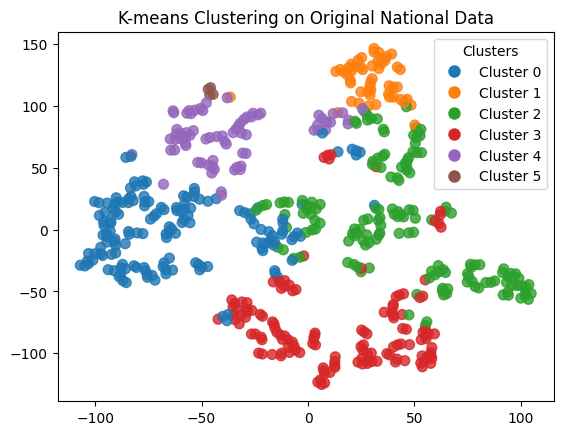

In [233]:
#same colormap issue here, so we created our own colormap again
from matplotlib.colors import ListedColormap
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
custom_cmap = ListedColormap(colors)
#kmeans fit to original data
natkmeans = KMeans(n_clusters=6, random_state=42)
natkmeans.fit_predict(Xnat)
#labels kmeans clusters and unique labels for the colors
natlabels = natkmeans.labels_
unique_labels = np.unique(natlabels)
natcentroids = natkmeans.cluster_centers_
#make an entry in national_data with the cluster values as kmeans predict for the national data
y_pred = natkmeans.predict(Xnat)
national_data['cluster'] = y_pred
#make dataframe object called clusterdata with the means of all important group clusters
clusterdata = pd.DataFrame(national_data.groupby('cluster')[['Hospital_Norm', 'Traffic_Norm', 'Enforcement_Norm', 'Fire_Norm',
       'Roads_Norm', 'Median_Age_Norm',
       'Crude Depression Prevalence Estimate_Norm', 'Average_Family_Size_Norm',
       'Shannon_Weiner', 'Percent_Male', 'Percent_H', 'Overdoses']].mean())
#label and unique labels for color and legend
unique_labels, natcounts = np.unique(natlabels, return_counts = True)
#print cluster label and number of points
for label, count in zip(unique_labels, natcounts):
    print(f'Cluster {label}: {count} points')
#show the plot
plt.scatter(Xnat_tsne[:, 0], Xnat_tsne[:, 1], c=natlabels, cmap=custom_cmap, s=50, alpha=0.8)
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab10(i), markersize=10) for i in unique_labels]
legend_labels = [f'Cluster {i}' for i in unique_labels]
plt.legend(handles=legend_handles, labels=legend_labels, title='Clusters')
plt.title('K-means Clustering on Original National Data')
plt.show()




In [204]:
#create csv with the clusterdata dataframe for analysis
clusterdata.to_csv("clusterdata.csv", index = False)


In [205]:
#create csv with new national_data with the y_pred added to it for analysis.
national_data.to_csv("nationalgyat.csv", index = False)